In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [5]:
#Loading data
bank = pd.read_csv("bank.csv",sep=';')

In [6]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
bank.shape

(4521, 17)

In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [9]:
#Checking Missing values
bank.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


**There are no missing values in the dataset!**

In [10]:
#Checking for duplicates
bank.duplicated().sum()

0

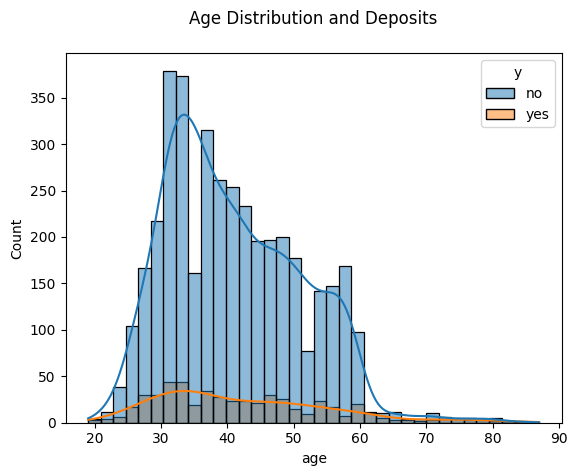

In [11]:
sns.histplot(x="age", data=bank, kde=True, hue= "y")
plt.title("Age Distribution and Deposits\n")
plt.show()

**Maximum clients are between the age 30 - 40 and majority clients subscribing to Term Deposit also fall between these age groups.**



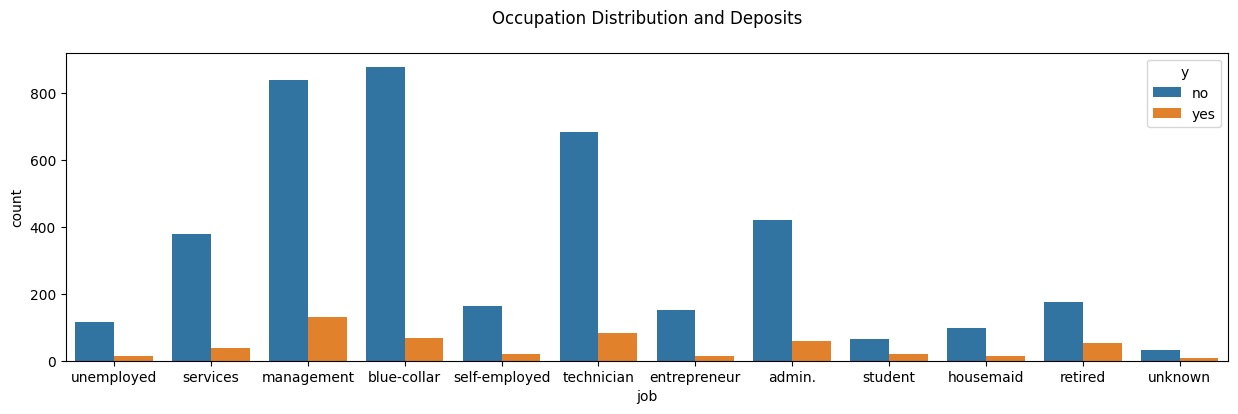

In [12]:
plt.figure(figsize=(15,4))
sns.countplot(x="job", data= bank, hue ="y")
plt.title("Occupation Distribution and Deposits\n")
plt.show()

**Majority of clients have occupation "Admin", "blue-collar" or "Technician" and maximum clients subscribing to Term Deposit also are from these occupation.**

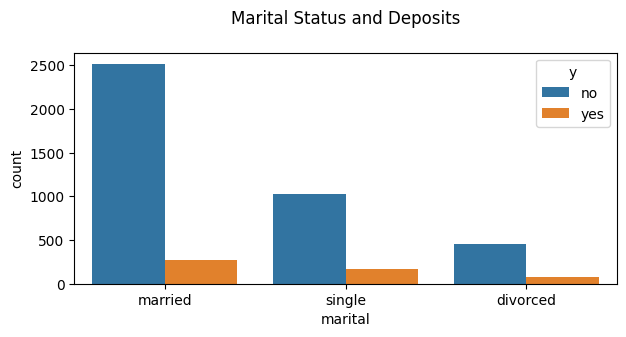

In [13]:
plt.figure(figsize=(7,3))
sns.countplot(x="marital", data= bank, hue ="y")
plt.title("Marital Status and Deposits\n")
plt.show()

**Clients are mostly married**

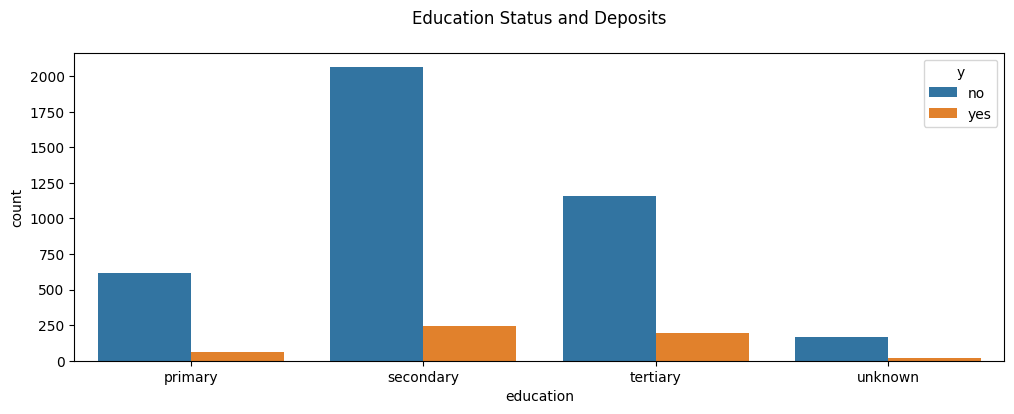

In [14]:
plt.figure(figsize=(12,4))
sns.countplot(x="education", data= bank, hue ="y")
plt.title("Education Status and Deposits\n")
plt.show()

**Most of the clients have University degree and have studied high or professional course.**

# Credit defaults - any ?

In [15]:
bank.default.value_counts()

,count
default,
no,4445
yes,76


**Distribution of Housing Loan**

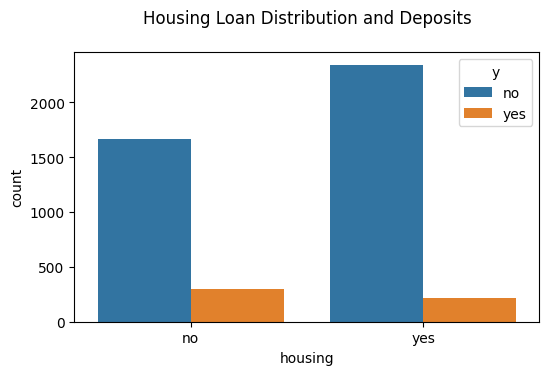

In [16]:
plt.figure(figsize=(6,3.5))
sns.countplot(x="housing", data= bank, hue ="y")
plt.title("Housing Loan Distribution and Deposits\n")
plt.show()

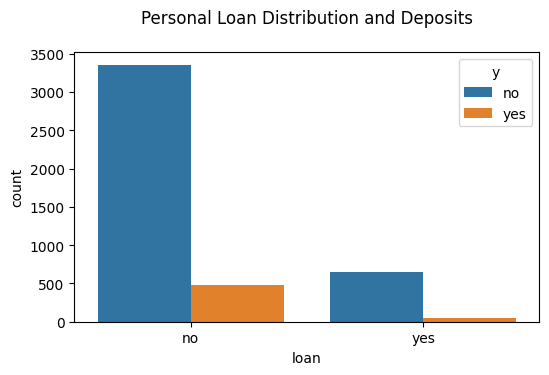

In [17]:
plt.figure(figsize=(6,3.5))
sns.countplot(x="loan", data= bank, hue ="y")
plt.title("Personal Loan Distribution and Deposits\n")
plt.show()

**Most of the Clients subscribing to Term Deposits dont have personal loan**

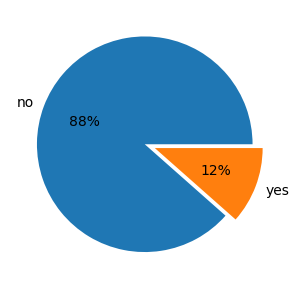

In [18]:
#Count of Outcome
bank.y.value_counts()
keys = bank.y.value_counts().index
data = bank.y.value_counts().values
plt.figure(figsize=(6,3.5))
explode = [0,0.1]
plt.pie(data,labels=keys,explode=explode, autopct='%.0f%%')
plt.show()

11% of clients have subscribed to Term Depos

# Label Encoding Categorical Features

In [19]:
cols = bank.select_dtypes("object").columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [20]:
le = LabelEncoder()

bank[cols] = bank[cols].apply(le.fit_transform)

In [21]:
bank.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0


Correlation Analysis using Heatmap

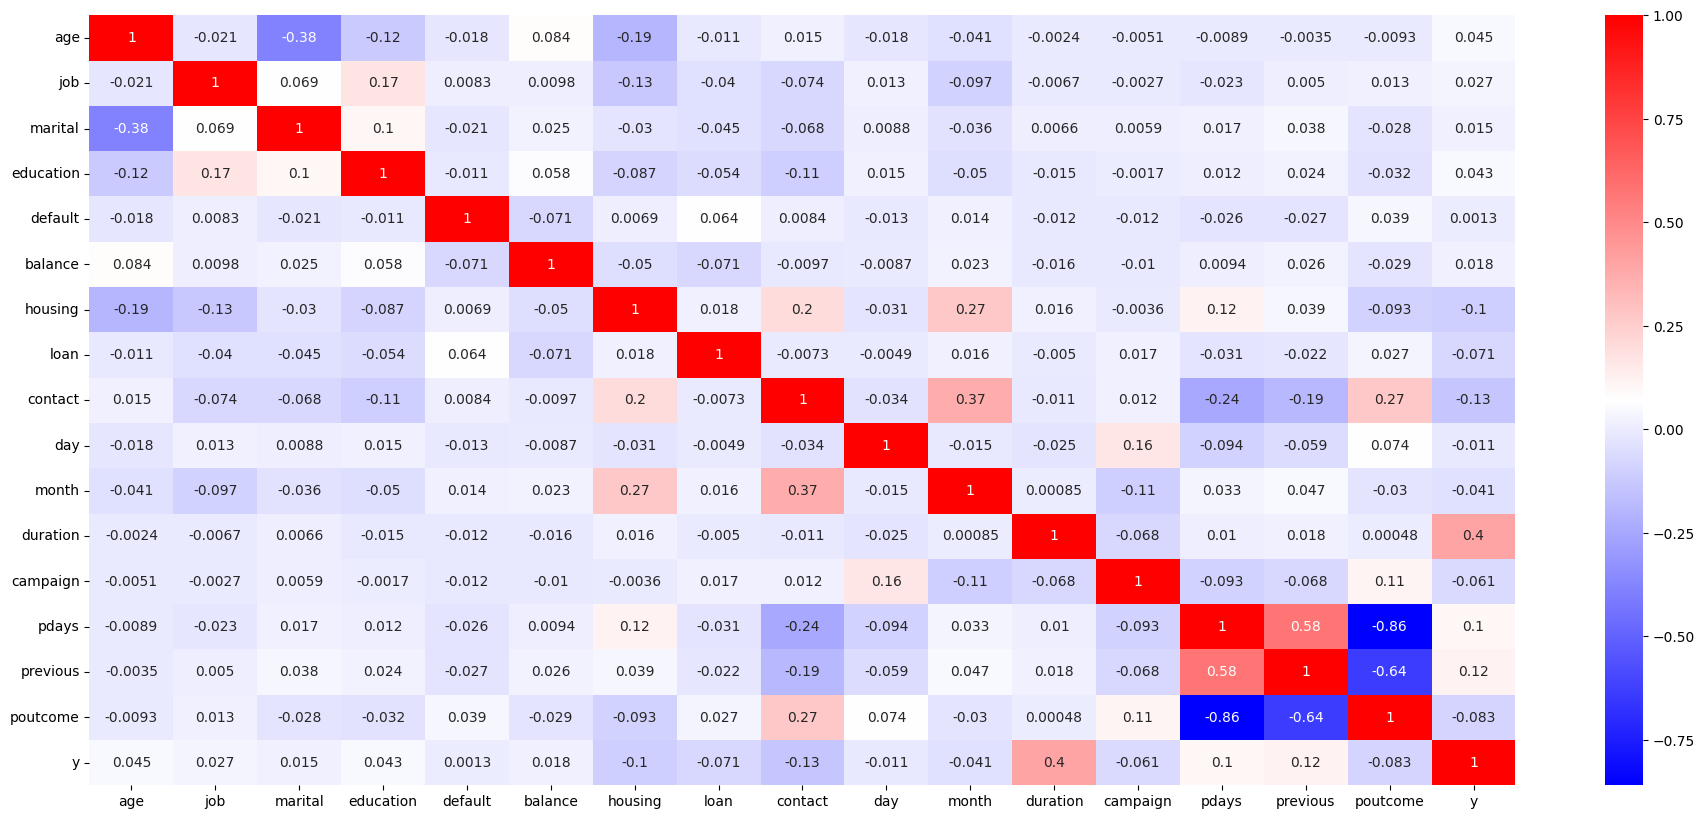

In [22]:
plt.figure(figsize=(23,10))
sns.heatmap(bank.corr(), cmap='bwr', annot=True)
plt.show()

Outcome "y" is positively correlated with duration of call and also shows slight correlation with previous attempts of call. This implies that clients went ahead with Term deposits subscription after gaining sufficient insights from bank calls and persuation.

# Standardisation

In [23]:
#Splitting input and output
X = bank.drop("y", axis=1)
y = bank.y

In [24]:
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

# Model building - Decision Tree Classifie

In [25]:
#Train-test split
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.3)

In [26]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)

DecisionTreeClassifier()

In [27]:
print('Train Score: {}'.format(decision_tree.score(train_X, train_y)))
print('Test Score: {}'.format(decision_tree.score(test_X, test_y)))

Train Score: 1.0
Test Score: 0.8695652173913043


In [28]:
cross_val_score(decision_tree, train_X, train_y, cv=5).mean()

0.8675720399144119

In [32]:
ypred = decision_tree.predict(test_X)
ypred

array([0, 1, 0, ..., 0, 0, 0])

In [33]:
print(classification_report(test_y,ypred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1207
           1       0.42      0.47      0.44       150

    accuracy                           0.87      1357
   macro avg       0.68      0.69      0.68      1357
weighted avg       0.88      0.87      0.87      1357



# Hyperparameter tunning

In [34]:
#Applying Grid search cv to find best estimaters to improve model performance

param_grid = {
    'max_depth': [3, 5, 7,10, None],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf': [3, 5, 7, 9,10,20]
    }

In [35]:
gscv = GridSearchCV(decision_tree, param_grid, cv=5, verbose=1)
gscv.fit(train_X, train_y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [3, 5, 7, 9, 10, 20]},
             verbose=1)

In [36]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3}

In [37]:
gscv.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

**we will use this best estimators to built our model.**

In [38]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf = 3)
clf.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

In [39]:
print('Train Score: {}'.format(clf.score(train_X, train_y)))
print('Test Score: {}'.format(clf.score(test_X, test_y)))

Train Score: 0.915929203539823
Test Score: 0.9012527634487841


In [40]:
pred_y = clf.predict(test_X)

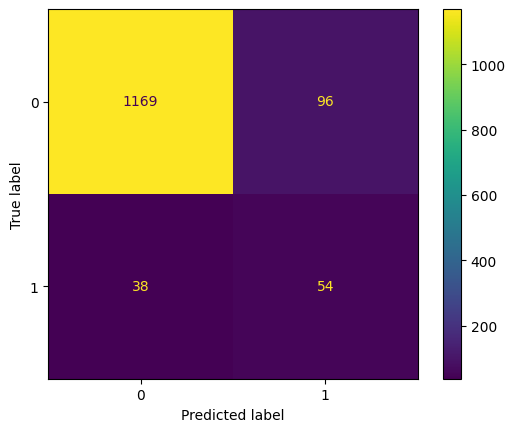

In [41]:
cm = confusion_matrix(pred_y, test_y)
ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()
plt.show()

In [42]:
#Classification Report
print(classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      1265
           1       0.36      0.59      0.45        92

    accuracy                           0.90      1357
   macro avg       0.66      0.76      0.70      1357
weighted avg       0.93      0.90      0.91      1357



In [43]:
#Accuracy Score
accuracy = accuracy_score(test_y,pred_y)
print("Test Accuracy of Decision Tree Classifier : {}".format(accuracy*100))

Test Accuracy of Decision Tree Classifier : 90.12527634487842
